<a href="https://colab.research.google.com/github/zskylarli/transcrobialGAN/blob/main/pix2pix_augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mxnet

     |████████████████████████████████| 47.3 MB 1.8 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import mxnet as mx
import cv2

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
PATH_OF_DATA= '/content/drive/MyDrive/transcrobialGAN'
!ls {PATH_OF_DATA}

 02162022_new		        JPEGs_ALL
 02212022_new		        pix2pix_augumentation.ipynb
 03032022_new		        processed_images
 03032022_old		        similarity_transcrobial_pix2pix.ipynb
 03032022_results	       'Transcrobial Images Dataset Sorting.gsheet'
 artgan-trial-checkpoints.zip   transcrobial_pix2pix.ipynb
 augumented_images


In [7]:
old_path = PATH_OF_DATA + '/processed_images'
new_path = PATH_OF_DATA + '/augumented_images'

162


In [66]:
list_of_files = []
with os.scandir(old_path) as it:
  for entry in it:
    if entry.is_file():
      list_of_files.append(entry.name)

print(len(list_of_files))

162


In [54]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    horizontal_flip=True, 
    vertical_flip=True, 
    fill_mode='constant')
  
for file in list_of_files:
  img = load_img(os.path.join(old_path,file))
  file = file.split('.png')
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

  pic = datagen.flow(x, batch_size = 1)
  i = 0
  for picture in pic:
    batch = pic.next()
    image = batch[0].astype('uint8')
    image[np.where((image==[0,0,0]).all(axis=2))] = [255,255,255];
    file_name = file[0] + '_' + str(i) + '.png';
    new_image_path = os.path.join(new_path,file_name)
    cv2.imwrite(new_image_path,image)
    i+=1
    if i > 5:
      break

In [67]:
new_path_2 = PATH_OF_DATA + '/hue_images'
hues = [0.3,0.4,0.5,0.6]

for file in list_of_files:
  org_image = mx.image.imread(os.path.join(old_path,file))
  file = file.split('.png')
  org_image = org_image.astype('float32')
  for i in hues:
    aug = mx.image.HueJitterAug(hue=i)
    aug_image = aug(org_image)
    file_name = file[0] + '_hue_' + str(i) + '.png';
    new_image_path_hue = os.path.join(new_path_2,file_name)
    cv2.imwrite(new_image_path_hue,aug_image.asnumpy())

# Show images (trial)

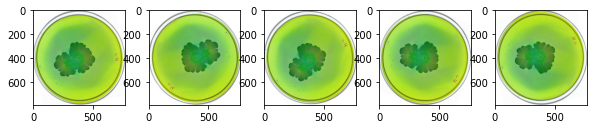

In [33]:
plt.figure(figsize=(10,8))
i = 1
pic = datagen.flow(x, batch_size = 1,save_to_dir=new_path, save_format='png')
for picture in pic:
  plt.subplot(4, 5, i)
  batch = pic.next()
  image = batch[0].astype('uint8')
  image[np.where((image==[0,0,0]).all(axis=2))] = [255,255,255];
  plt.imshow(image)
  i+=1
  if i > 5:
    break
plt.show()

0.3
0.4
0.5


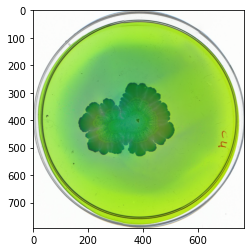

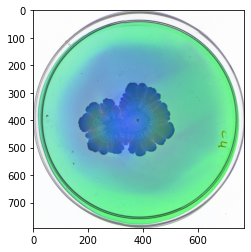

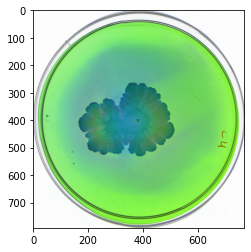

In [41]:
test_img = mx.image.imread(os.path.join(old_path,file))
test_img = test_img.astype('float32')
hues = [0.3,0.4,0.5]
hue_images = []

for i in hues:
  aug = mx.image.HueJitterAug(hue=i)
  aug_image = aug(test_img)
  hue_images.append(aug_image)

for image in hue_images:
  plt.figure()
  image.shape[2] == 3, 
  plt.imshow((image.clip(0, 255)/255).asnumpy())